# Лабораторная работа №1: Моделирование стандартных дискретных сигналов

Выполнили студенты гр. 2384 Фёдоров Михайл Вадимович и Муравин Егор Евгеньевич. Вариант №16.

## Цель работы

Изучить свойства дискретных сигналов и их взаимосвязь с непрерывными аналогами.  

# Основные теоретические положения


## Дискретное и нормированное время

Дискретное время определяется как  

$$
t = nT, \quad n = 0,1,2,\dots,N-1,
$$  

где $T$ — период дискретизации, $N$ — количество отсчётов.  

Нормированное дискретное время имеет вид  

$$
n \in [0, N-1]
$$  



## Единичный цифровой импульс


$$
\delta_d(k) =
\begin{cases}
1, & k = 0, \\
0, & k \neq 0.
\end{cases}
$$  

## Дельта-функция Дирака

$$ \delta(t) = \begin{cases} \infty, & t = 0 \\ 0, & t \neq 0 \end{cases}, \quad \text{и} \quad \int_{-\infty}^{\infty} \delta(t) dt = 1 $$

## Eдиничный скачок

Единичный дискретный скачок:
$$ \sigma_d(k) = \begin{cases} 1, & k \geq 0 \\ 0, & k < 0 \end{cases}, k \in \mathbb{Z} $$

Единичный аналоговый скачок:

$$ \sigma(t) = \begin{cases} 1, & t \geq 0 \\ 0, & t < 0 \end{cases}, t \in \mathbb{R} $$


Частота дискретизации:
$$
f_s = \frac{1}{T}.
$$  

## Экспоненциальная функция
Дискретная экспонента:
$$
s_1(k) = a^k, \quad k \geq 0, k \in \mathbb{C}
$$  

Аналоговая экспонента:

$$
s(t) = a^{t}, \quad t \geq 0, t \in \mathbb{R}
$$  


## Комплексный гармонический сигнал
Дискретный комплексный гармонический сигнал:

$$
s_2(k) = C \, e^{j \omega_0 k},
$$  

где $C \in \mathbb{C}$,$k \in \mathbb{Z}$, $\omega_0$ — дискретная круговая частота.  

Представление через действительную и мнимую части:  

$$
s_2(k) = C \cos(\omega_0 k) + j C \sin(\omega_0 k).
$$  

Сигнал можно интерпретировать как комбинацию двух вещественных последовательностей:  

$$
\Re\{s_2(k)\} = C \cos(\omega_0 k), \quad \Im\{s_2(k)\} = C \sin(\omega_0 k).
$$  

Аналоговый комплексный гармонический сигнал:
$$ s_2(k) = C \exp(j \hat{\omega_0} k) = C (\cos(\hat{\omega_0} k) + j \sin(\hat{\omega_0} k)), k \in \mathbb{Z} $$

##  Задержанные последовательности

Сдвиг последовательности на $m$:  

- для импульса:  

$$
\delta_d(k-m) =
\begin{cases}
1, & k = m \\
0, & k \neq m
\end{cases}, k \in \mathbb{Z}
$$  

- для скачка:  

$$
\sigma_d(k-m) =
\begin{cases}
1, & k \geq m \\
0, & k < m
\end{cases}, k \in \mathbb{Z}
$$  

- для экспоненты:  

$$
s_1(k - m) = \begin{cases} a^{k - m}, & k \geq m \\ 0, & k < m \end{cases}, k \in \mathbb{Z}
$$  


## Постановка задачи

С помощью программных средств провести моделирование и анализ стандартных дискретных последовательностей. Результаты подкрепить соответствующими графиками и выводами.

## Выполнение работы

Пункты работы выполняется с помощью кода.

In [1]:
import cmath as cm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from dataclasses import dataclass


@dataclass
class Params:
  N: int
  T: float
  a: float
  C: int
  w0: float
  m: int

  @classmethod
  def get_paramas(cls, Nb: int) -> "Params":
    return Params(
      30 + Nb % 5,
      0.0005 * (1 + Nb % 3),
      (-1) ** Nb * (0.8 + 0.005 * (Nb % 20)),
      1 + Nb % 5,
      cm.pi / (6 + Nb % 5),
      5 + Nb % 5,
    )

@dataclass
class Intervals:
  n: np.ndarray[float]
  nT: np.ndarray[float]

  @classmethod
  def get_intervals(cls, params: Params) -> "Intervals":
    return Intervals(
      np.arange(params.N),
      np.arange(params.N) * params.T,
    )

params = Params.get_paramas(16)
intervals = Intervals.get_intervals(params)
print(params)

Params(N=31, T=0.001, a=0.88, C=2, w0=0.4487989505128276, m=6)


In [3]:
def single_pulse(param: Params, k):
  return k == 0

def single_jump(param: Params, k):
  return k >= 0

def s1(param: Params, k):
  return param.a ** k if k >= 0 else 0.0

def s2(param: Params, k):
  return param.C * cm.exp(1j * param.w0 * k)

def create_graph(x, y, title, xlabel, ylabel) -> plt.Figure:
  fig = plt.figure()
  plt.stem(x, y, markerfmt="o")
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  return fig

In [4]:
def visualize_basic_signals(
  basic_signal,
  params,
  inretvals,
  title,
  ylabel,
  offset=0,
  show_nT=True,
):
  processed_signal = np.vectorize(lambda k: basic_signal(params, k - offset))
  basic_signal_on_n = processed_signal(intervals.n)

  create_graph(
    intervals.n,
    basic_signal_on_n,
    title,
    'n',
    ylabel('n'),
  ).show()

  if not show_nT:
    return

  create_graph(
    intervals.nT,
    basic_signal_on_n,
    title,
    'nT, с',
    ylabel('nT'),
  ).show()

### Задание 1

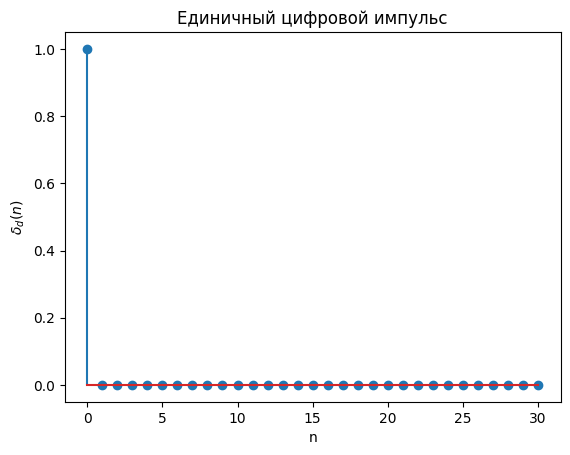

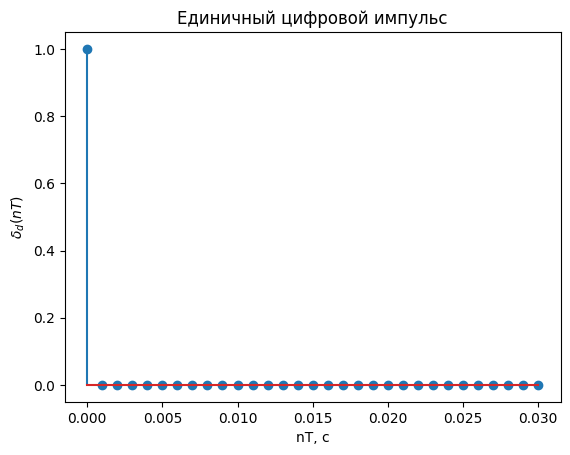

In [5]:
visualize_basic_signals(
  single_pulse,
  params,
  intervals,
  'Единичный цифровой импульс',
  lambda c: f'$\\delta_d({c})$',
)

Дискретное и дискретное нормированное время связаны следующим образом: t = nT, n - дискретное, t - дискретное нормированное время.

Различие между единичным цифровым импульсом и дельта-функцией:

Единичный цифровой импульс
$$
\delta_d(n) =
\begin{cases}
1, & n = 0, \\
0, & n \neq 0.
\end{cases}
$$  

Дельта-функция Дирака
$$ \delta(t) = \begin{cases} \infty, & t = 0 \\ 0, & t \neq 0 \end{cases}, \quad \text{и} \quad \int_{-\infty}^{\infty} \delta(t) dt = 1 $$

### Задание 2

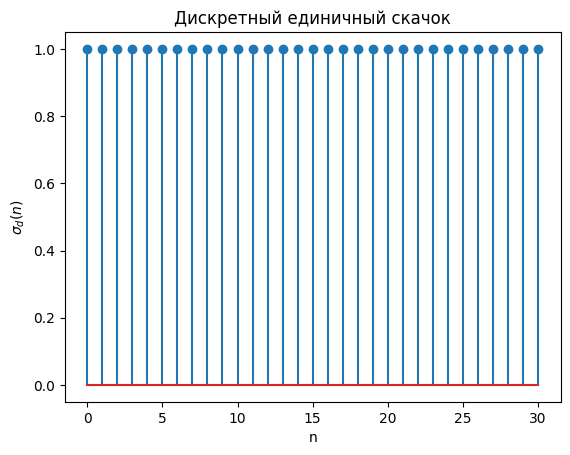

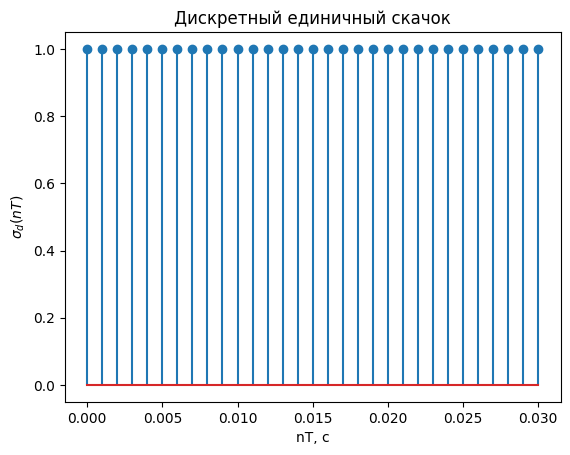

In [6]:
visualize_basic_signals(
  single_jump,
  params,
  intervals,
  'Дискретный единичный скачок',
  lambda c: f'$\\sigma_d({c})$',
)

Дискретный скачек определён только в дискретные моменты времени, а аналоговый скачок определен для всех значений времени.

Частота дискретизации единичного скачка:
$$
f_s = \frac{1}{T}.
$$  

### Задание 3

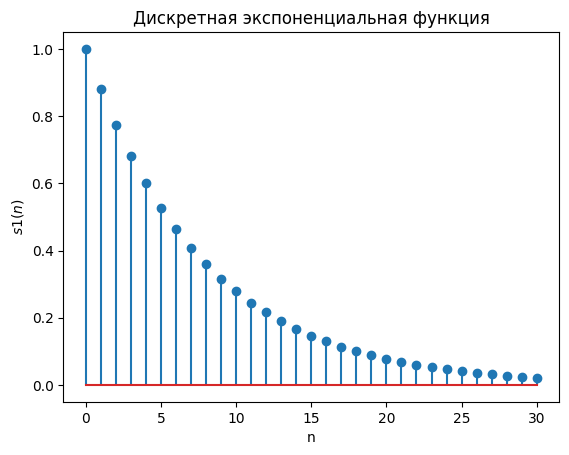

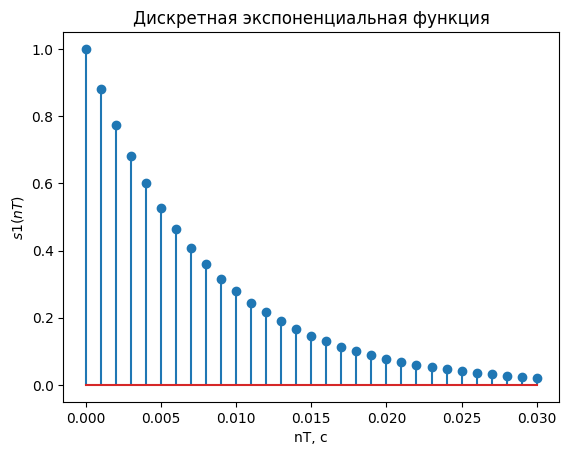

In [7]:
visualize_basic_signals(
  s1,
  params,
  intervals,
  'Дискретная экспоненциальная функция',
  lambda c: f'$s1({c})$',
)

Различие между дискретной экспоненциальной функцией и аналоговой экспоненциальной функцией заключается в том, что дискретная экспонента определена только в дискретные моменты времени, тогда как аналоговая экспонента определена для всех значений времени.

### Задание 4

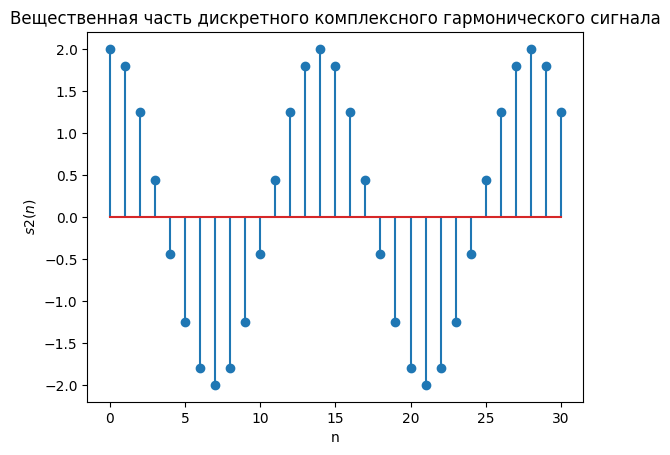

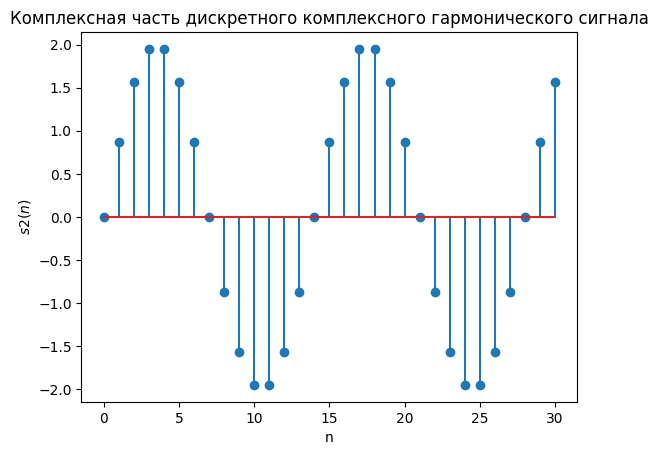

In [8]:
s2_real = lambda params, k: np.real(s2(params, k))
s2_imag = lambda params, k: np.imag(s2(params, k))

visualize_basic_signals(
  s2_real,
  params,
  intervals,
  'Вещественная часть дискретного комплексного гармонического сигнала',
  lambda c: f'$s2({c})$',
  show_nT=False,
)

visualize_basic_signals(
  s2_imag,
  params,
  intervals,
  'Комплексная часть дискретного комплексного гармонического сигнала',
  lambda c: f'$s2({c})$',
  show_nT=False,
)

$$
\Re\{s_2(k)\} = C \cos(\omega_0 k), \quad \Im\{s_2(k)\} = C \sin(\omega_0 k).
$$

### Задане 5

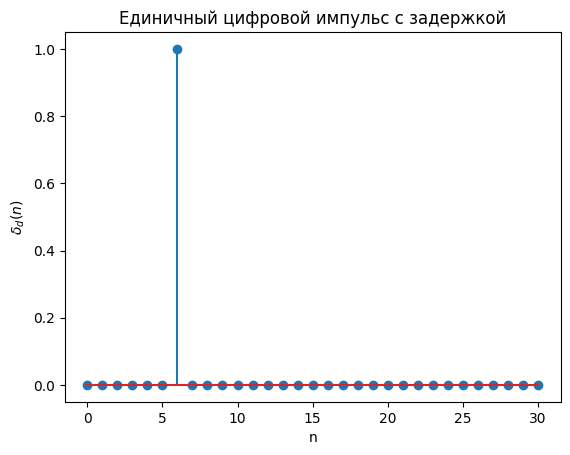

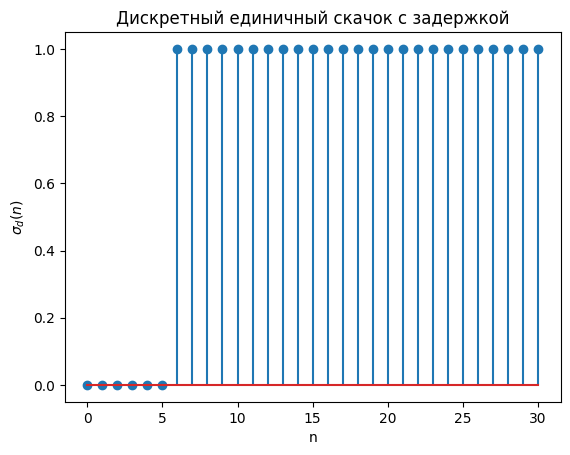

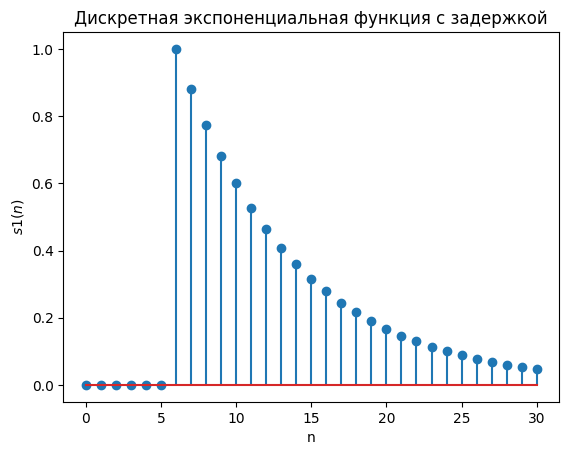

In [9]:
visualize_basic_signals(
  single_pulse,
  params,
  intervals,
  'Единичный цифровой импульс с задержкой',
  lambda c: f'$\\delta_d({c})$',
  offset=params.m,
  show_nT=False,
)

visualize_basic_signals(
  single_jump,
  params,
  intervals,
  'Дискретный единичный скачок с задержкой',
  lambda c: f'$\\sigma_d({c})$',
  offset=params.m,
  show_nT=False,
)

visualize_basic_signals(
  s1,
  params,
  intervals,
  'Дискретная экспоненциальная функция с задержкой',
  lambda c: f'$s1({c})$',
  offset=params.m,
  show_nT=False,
)

Сдвиг последовательности на $m$:  

- для импульса:  

$$
\delta_d(k-m) =
\begin{cases}
1, & k = m \\
0, & k \neq m
\end{cases}, k \in \mathbb{Z}
$$  

- для скачка:  

$$
\sigma_d(k-m) =
\begin{cases}
1, & k \geq m \\
0, & k < m
\end{cases}, k \in \mathbb{Z}
$$  

- для экспоненты:  

$$
s_1(k - m) = \begin{cases} a^{k - m}, & k \geq m \\ 0, & k < m \end{cases}, k \in \mathbb{Z}
$$  

## Выводы

В ходе выполнения лабораторной работы были изучены и смоделированы основные стандартные дискретные сигналы: единичный цифровой импульс, единичный скачок, дискретная экспонента и комплексный гармонический сигнал. Для каждого из них были построены графики как в обычном, так и в нормированном времени, а также исследованы их задержанные версии.

Были выявлены и проанализированы ключевые различия между дискретными и аналоговыми сигналами. Главное отличие заключается в том, что дискретные сигналы определены только в определённые моменты времени, в то время как аналоговые сигналы непрерывны во времени.

Таким образом, работа позволила на практике закрепить понимание природы дискретных сигналов, их моделей и визуализации, а также чётко определить их соотношение с аналоговыми сигналами.